In [167]:
import os
import pandas as pd
import numpy as np

In [168]:
# 엑셀 파일 목록 가져오기
excel_files = [f for f in os.listdir('.') if f.endswith(('.xlsx', '.xls'))]
len(excel_files)

44

In [169]:
colName = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM']
idx = 0
df = pd.DataFrame()
for file in excel_files:
    df_comp = pd.DataFrame()
    df_sub = pd.read_excel(file, sheet_name='LA')
    df_sub.columns = colName
    exp_num = [idx] * 10
    voltage = df_sub['N'].iloc[4]
    Temp_F = df_sub['G'].iloc[13:23]
    Temp_A = df_sub['H'].iloc[13:23]
    Temp_B = df_sub['I'].iloc[13:23]
    C_E = float(df_sub['C'].iloc[7].split('M')[0])
    Ci_LA = float(df_sub['C'].iloc[4].split('M')[0])
    Ci_K = float(df_sub['C'].iloc[4].split('M')[1].split('+')[1])
    time = df_sub['C'].iloc[13:23]
    CF_LA = df_sub['P'].iloc[13:23]
    CA_LA = df_sub['Q'].iloc[13:23]
    CB_LA = df_sub['R'].iloc[13:23]
    CF_K = df_sub['AB'].iloc[13:23]
    CA_K = df_sub['AC'].iloc[13:23]
    CB_K = df_sub['AD'].iloc[13:23]
    pH_F = df_sub['S'].iloc[13:23]
    pH_A = df_sub['T'].iloc[13:23]
    pH_B = df_sub['U'].iloc[13:23]
    VF_Tank = df_sub['AE'].iloc[13:23]
    VA_Tank = df_sub['AF'].iloc[13:23]
    VB_Tank = df_sub['AG'].iloc[13:23]
    VF_Line = df_sub['AE'].iloc[10]
    VA_Line = df_sub['AF'].iloc[10]
    VB_Line = df_sub['AG'].iloc[10]

    SEC = pd.concat([pd.Series([0]), df_sub['AC'].iloc[63:73], pd.Series([np.nan] * (9 - len(df_sub['AC'].iloc[63:73])))]).to_list()

    df_cur = pd.read_excel(file, sheet_name='Auto save')
    t_cur = df_cur['t']
    cur = df_cur['Current']
    cur_list = []
    for t in time:
        if pd.isna(t):
            cur_list.append(np.nan)
            continue
        # 가장 가까운 시간 인덱스 찾기
        idx2 = np.abs(t_cur - t).argmin()
        cur_list.append(cur.iloc[idx2])
    
    # 10개 미만이면 NaN으로 채우기
    if len(cur_list) < 10:
        cur_list.extend([np.nan] * (10 - len(cur_list)))


    df_comp = pd.concat([df_comp, pd.DataFrame({'exp': exp_num, 'Voltage [V]': voltage, 'Temp_F [C]': Temp_F, 'Temp_A [C]': Temp_A, 'Temp_B [C]': Temp_B, 'Electrolyte [M]': C_E,
                                      'Ci_LA [M]': Ci_LA, 'Ci_K [M]': Ci_K, 'Time [hr]': time,
                                      'CF_LA [M]': CF_LA, 'CA_LA [M]': CA_LA, 'CB_LA [M]': CB_LA,
                                      'CF_K [M]': CF_K, 'CA_K [M]': CA_K, 'CB_K [M]': CB_K,
                                      'pH_F': pH_F, 'pH_A': pH_A, 'pH_B': pH_B,
                                      'VF_Tank [L]': VF_Tank, 'VA_Tank [L]': VA_Tank, 'VB_Tank [L]': VB_Tank,
                                      'VF_Line [L]': VF_Line, 'VA_Line [L]': VA_Line, 'VB_Line [L]': VB_Line,
                                      'SEC [kWh/kg]': SEC, 'Current [A]': cur_list})], ignore_index=True)
    if idx == 0:
        df = df_comp
    else:
        df = pd.concat([df, df_comp], ignore_index=True)
    idx += 1
df

,exp,Voltage [V],Temp_F [C],Temp_A [C],Temp_B [C],Electrolyte [M],Ci_LA [M],Ci_K [M],Time [hr],CF_LA [M],...,pH_A,pH_B,VF_Tank [L],VA_Tank [L],VB_Tank [L],VF_Line [L],VA_Line [L],VB_Line [L],SEC [kWh/kg],Current [A]
0,0,30,20.9,20.7,21.2,0.25,0.5,1.0,0,0.467925,...,10.72,11.54,0.8,0.8,0.8,0.20,0.2,0.20,0.000000,0.1
1,0,30,25.6,25.7,26.2,0.25,0.5,1.0,1,0.434063,...,2.96,13.04,0.8,0.8,0.8,0.20,0.2,0.20,2.011212,1.0
2,0,30,29.5,29.3,29.9,0.25,0.5,1.0,2,0.312599,...,2.36,13.45,0.8,0.8,0.8,0.20,0.2,0.20,1.311964,1.7
3,0,30,26.2,26.1,27,0.25,0.5,1.0,3,-0.004546,...,2.17,13.58,0.8,0.8,0.8,0.20,0.2,0.20,0.909535,0.4
4,0,30,NaN,NaN,NaN,0.25,0.5,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.20,0.2,0.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,43,35,35,34.3,34.7,0.50,3.0,3.0,5.933333,0.258292,...,2.242,13.739,0.1,1.2,2.05,0.18,0.2,0.15,3.102596,3.5
436,43,35,29.8,29,29.6,0.50,3.0,3.0,6.933333,0.048301,...,2.255,13.991,0.05,1.2,2.1,0.18,0.2,0.15,3.098637,1.0
437,43,35,NaN,NaN,NaN,0.50,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,0.2,0.15,NaN,NaN
438,43,35,NaN,NaN,NaN,0.50,3.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,0.2,0.15,NaN,NaN


In [170]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

Voltage List: [30 20 10 35]


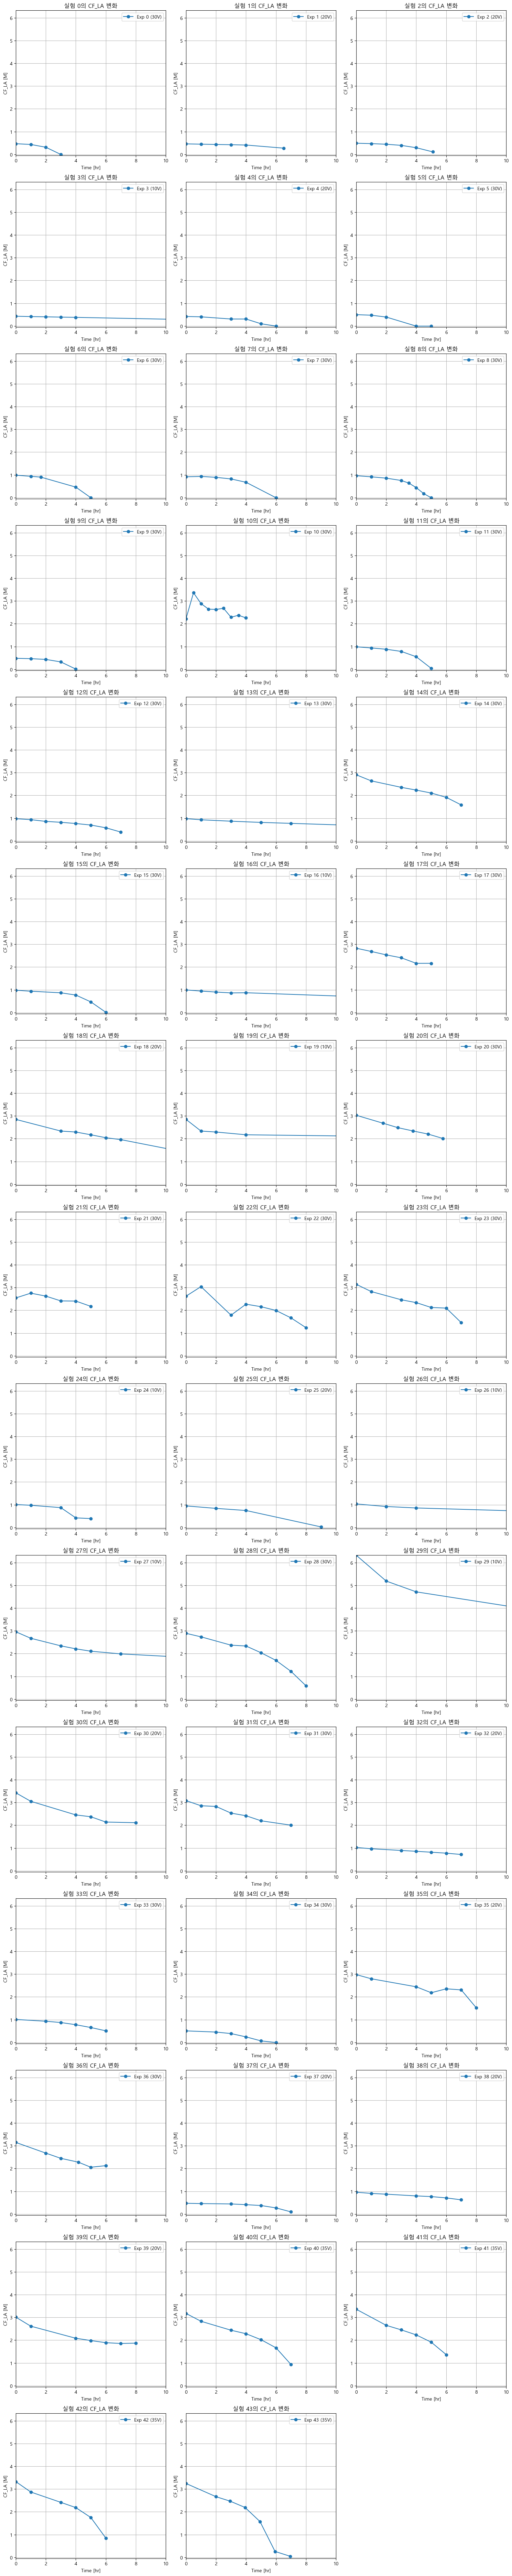

In [171]:
print(f'Voltage List: {df['Voltage [V]'].unique()}')
# 모든 실험 데이터 사용
exp_numbers = df['exp'].unique()
n_exps = len(exp_numbers)

# 한 행에 3개의 plot이 오도록 설정
n_cols = 3
n_rows = int(np.ceil(n_exps / n_cols))

# 전체 데이터의 y축 범위 계산
y_min = df['CF_LA [M]'].min()
y_max = df['CF_LA [M]'].max()

plt.figure(figsize=(15, 5*n_rows))  # 행 수에 따라 figure 높이 조정
for i, exp in enumerate(exp_numbers):
    exp_data = df[df['exp'] == exp]
    voltage = exp_data['Voltage [V]'].iloc[0]  # 해당 실험의 전압값 가져오기
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(exp_data['Time [hr]'], exp_data['CF_LA [M]'], 
             marker='o',
             label=f'Exp {exp} ({voltage}V)')
    
    plt.xlabel('Time [hr]')
    plt.ylabel('CF_LA [M]')
    plt.title(f'실험 {exp}의 CF_LA 변화')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 10)  # x축 범위를 0에서 10시간으로 제한
    plt.ylim(y_min, y_max)  # 모든 subplot의 y축 범위를 동일하게 설정

plt.tight_layout()
plt.show()


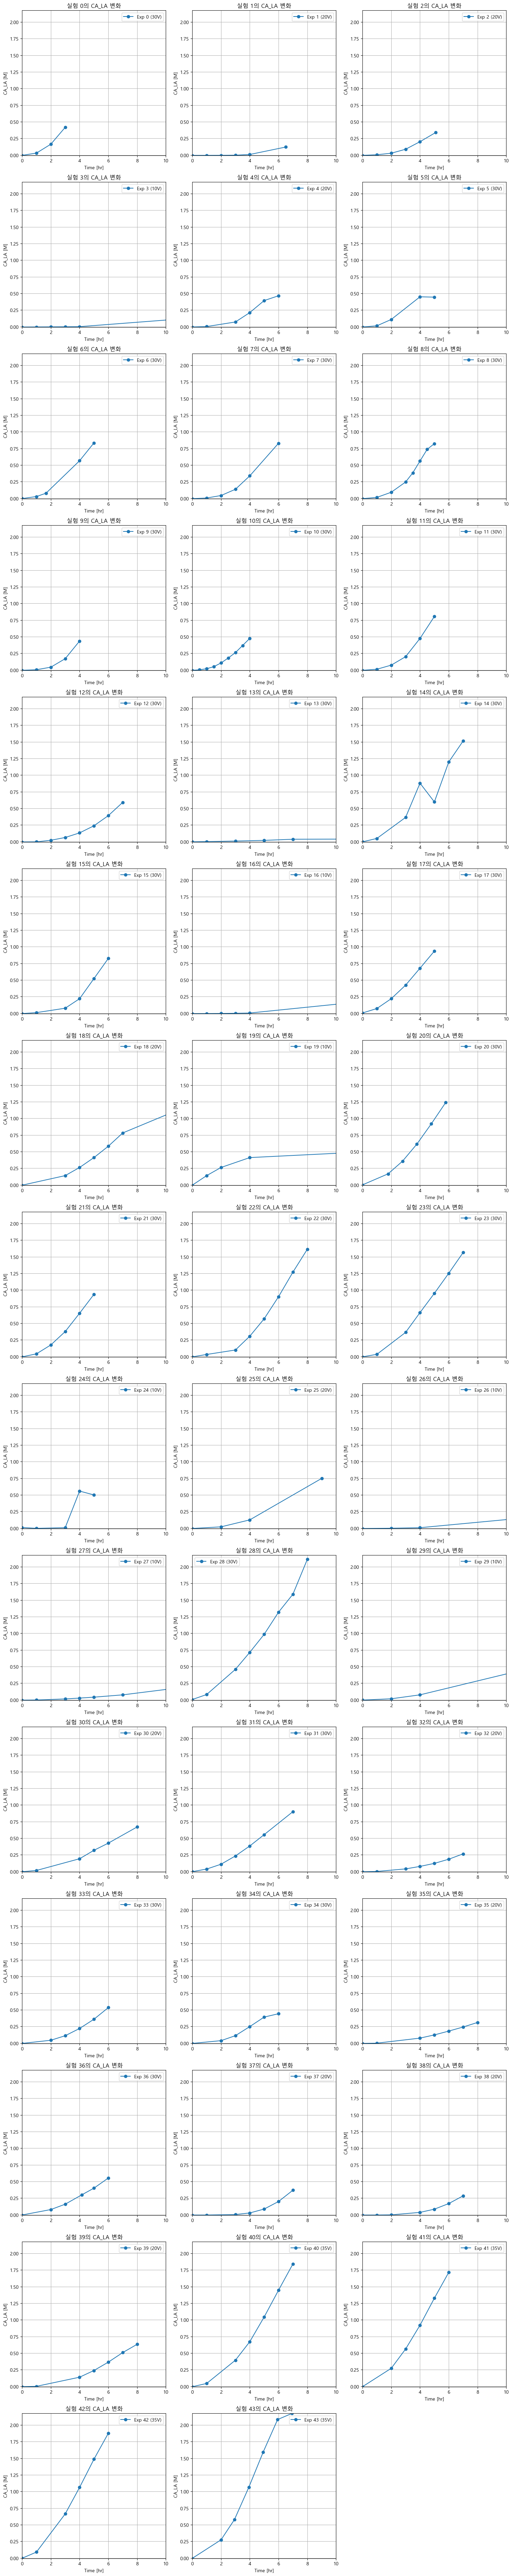

In [172]:
# 한 행에 3개의 plot이 오도록 설정
n_cols = 3
n_rows = int(np.ceil(n_exps / n_cols))

# 전체 데이터의 y축 범위 계산
y_min = df['CA_LA [M]'].min()
y_max = df['CA_LA [M]'].max()

plt.figure(figsize=(15, 5*n_rows))  # 행 수에 따라 figure 높이 조정
for i, exp in enumerate(exp_numbers):
    exp_data = df[df['exp'] == exp]
    voltage = exp_data['Voltage [V]'].iloc[0]  # 해당 실험의 전압값 가져오기
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(exp_data['Time [hr]'], exp_data['CA_LA [M]'], 
             marker='o',
             label=f'Exp {exp} ({voltage}V)')
    
    plt.xlabel('Time [hr]')
    plt.ylabel('CA_LA [M]')
    plt.title(f'실험 {exp}의 CA_LA 변화')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 10)  # x축 범위를 0에서 10시간으로 제한
    plt.ylim(y_min, y_max)  # 모든 subplot의 y축 범위를 동일하게 설정

plt.tight_layout()
plt.show()

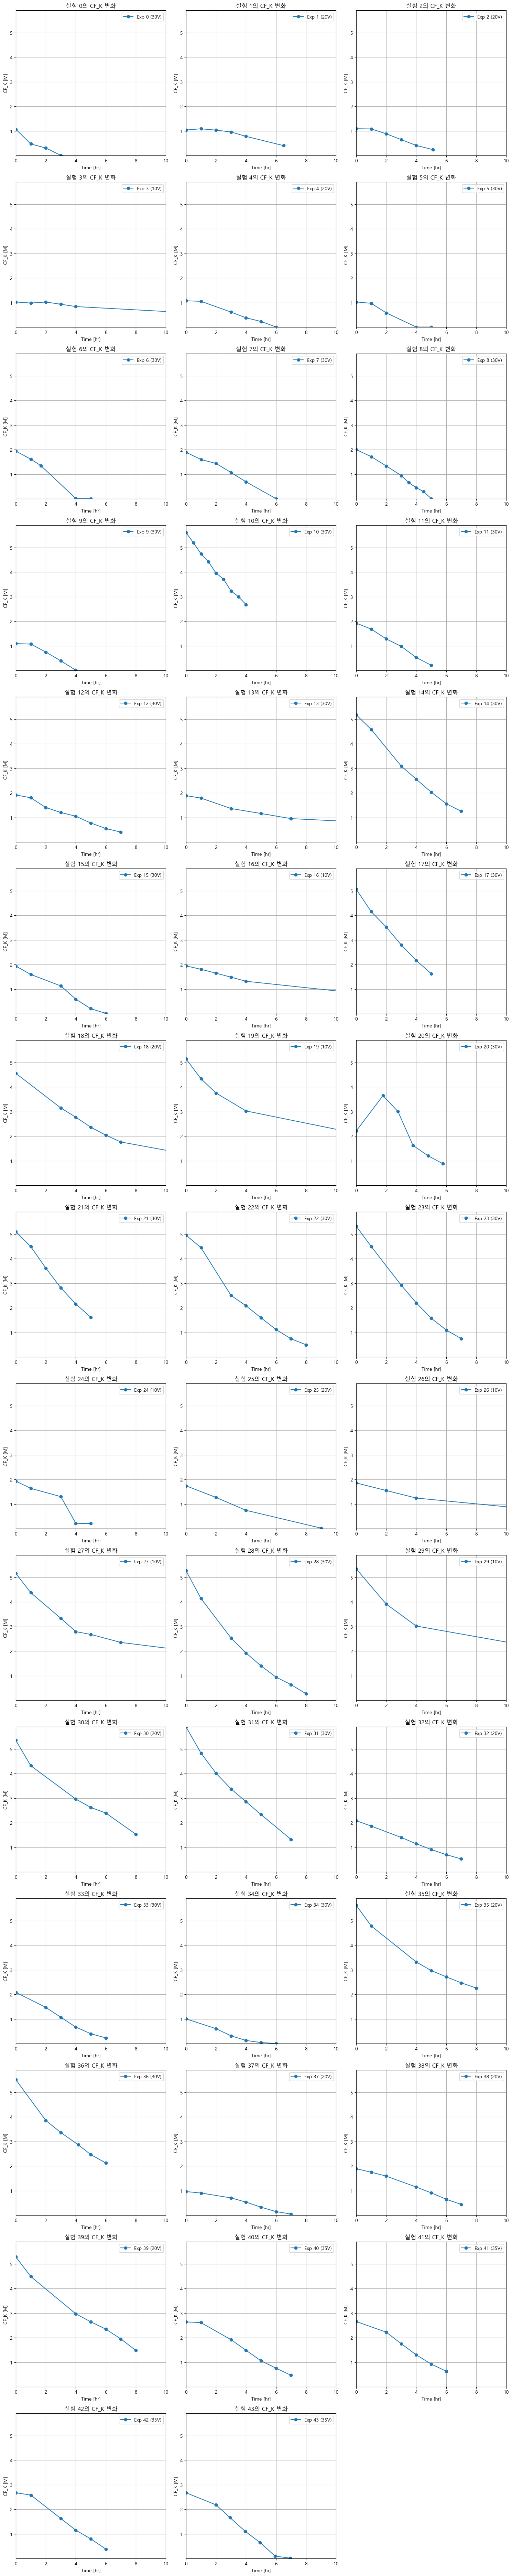

In [173]:
# 한 행에 3개의 plot이 오도록 설정
n_cols = 3
n_rows = int(np.ceil(n_exps / n_cols))

# 전체 데이터의 y축 범위 계산
y_min = df['CF_K [M]'].min()
y_max = df['CF_K [M]'].max()

plt.figure(figsize=(15, 5*n_rows))  # 행 수에 따라 figure 높이 조정
for i, exp in enumerate(exp_numbers):
    exp_data = df[df['exp'] == exp]
    voltage = exp_data['Voltage [V]'].iloc[0]  # 해당 실험의 전압값 가져오기
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(exp_data['Time [hr]'], exp_data['CF_K [M]'], 
             marker='o',
             label=f'Exp {exp} ({voltage}V)')
    
    plt.xlabel('Time [hr]')
    plt.ylabel('CF_K [M]')
    plt.title(f'실험 {exp}의 CF_K 변화')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 10)  # x축 범위를 0에서 10시간으로 제한
    plt.ylim(y_min, y_max)  # 모든 subplot의 y축 범위를 동일하게 설정

plt.tight_layout()
plt.show()

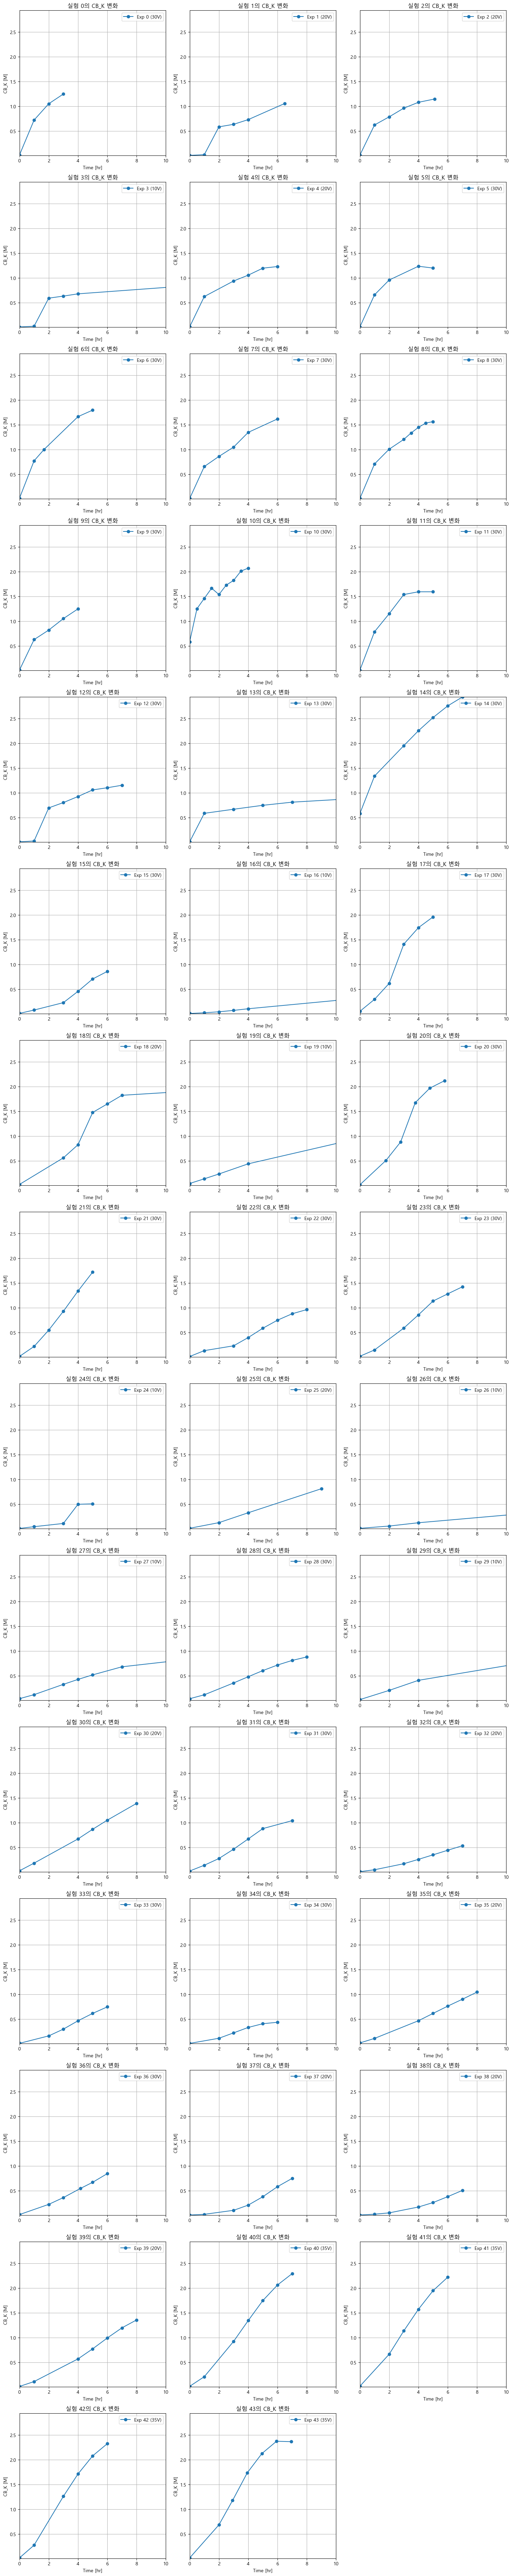

In [174]:
# 한 행에 3개의 plot이 오도록 설정
n_cols = 3
n_rows = int(np.ceil(n_exps / n_cols))

# 전체 데이터의 y축 범위 계산
y_min = df['CB_K [M]'].min()
y_max = df['CB_K [M]'].max()

plt.figure(figsize=(15, 5*n_rows))  # 행 수에 따라 figure 높이 조정
for i, exp in enumerate(exp_numbers):
    exp_data = df[df['exp'] == exp]
    voltage = exp_data['Voltage [V]'].iloc[0]  # 해당 실험의 전압값 가져오기
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(exp_data['Time [hr]'], exp_data['CB_K [M]'], 
             marker='o',
             label=f'Exp {exp} ({voltage}V)')
    
    plt.xlabel('Time [hr]')
    plt.ylabel('CB_K [M]')
    plt.title(f'실험 {exp}의 CB_K 변화')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 10)  # x축 범위를 0에서 10시간으로 제한
    plt.ylim(y_min, y_max)  # 모든 subplot의 y축 범위를 동일하게 설정

plt.tight_layout()
plt.show()

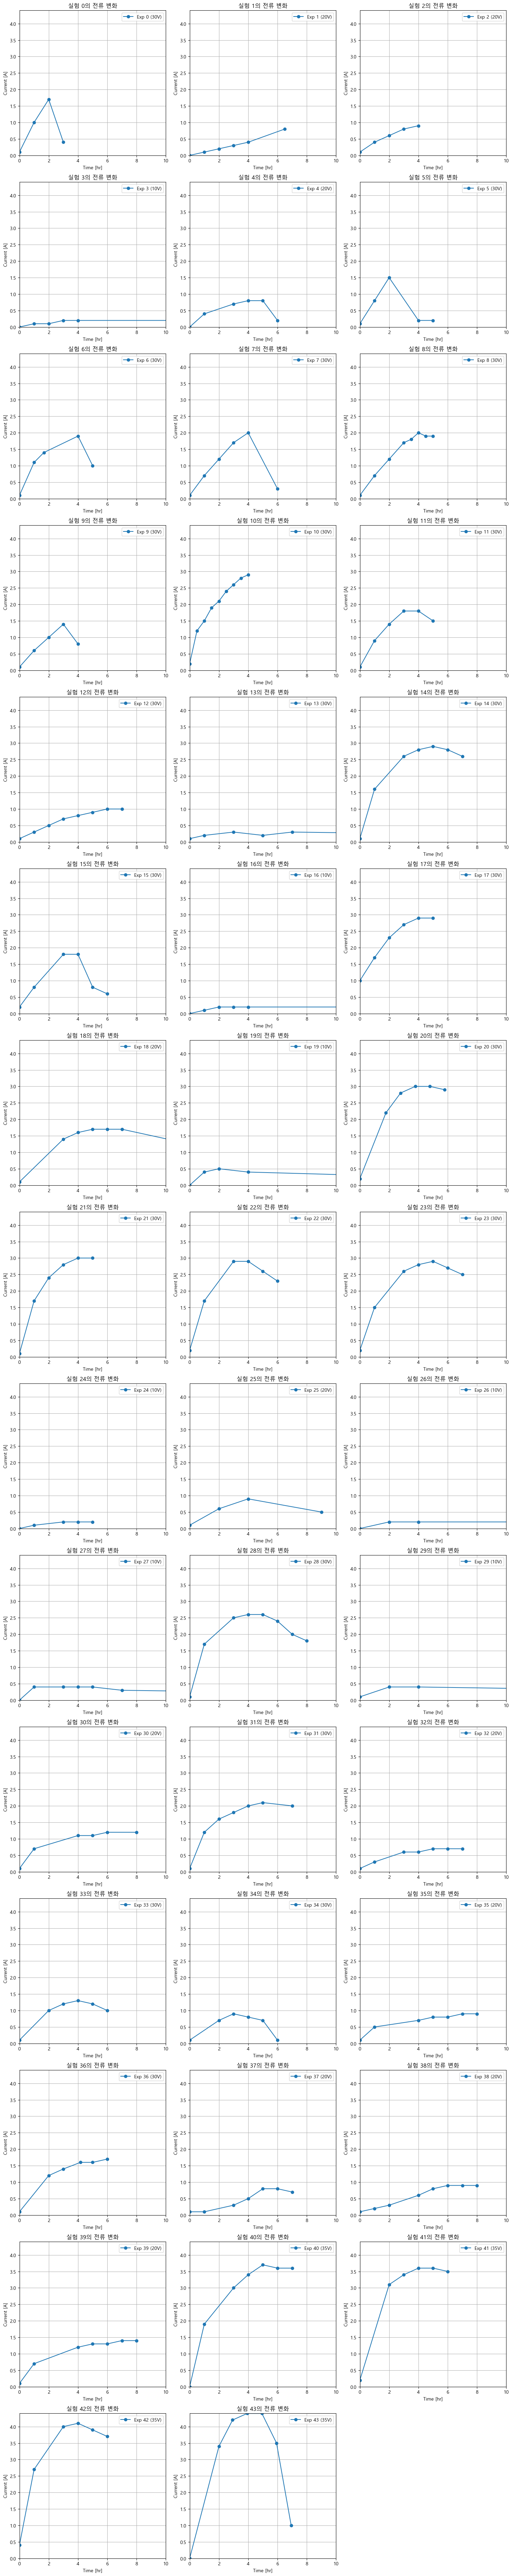

In [175]:
# 한 행에 3개의 plot이 오도록 설정
n_cols = 3
n_rows = int(np.ceil(n_exps / n_cols))

# 전체 데이터의 y축 범위 계산
y_min = df['Current [A]'].min()
y_max = df['Current [A]'].max()

plt.figure(figsize=(15, 5*n_rows))  # 행 수에 따라 figure 높이 조정
for i, exp in enumerate(exp_numbers):
    exp_data = df[df['exp'] == exp]
    voltage = exp_data['Voltage [V]'].iloc[0]  # 해당 실험의 전압값 가져오기
    plt.subplot(n_rows, n_cols, i+1)
    plt.plot(exp_data['Time [hr]'], exp_data['Current [A]'], 
             marker='o',
             label=f'Exp {exp} ({voltage}V)')
    
    plt.xlabel('Time [hr]')
    plt.ylabel('Current [A]')
    plt.title(f'실험 {exp}의 전류 변화')
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 10)  # x축 범위를 0에서 10시간으로 제한
    plt.ylim(y_min, y_max)  # 모든 subplot의 y축 범위를 동일하게 설정

plt.tight_layout()
plt.show()

In [176]:
df.to_csv('BMED_RAW_DATA.csv', index=False)

In [177]:
# 제외할 실험 번호 리스트 생성
exclude_exps = [10, 13, 14, 19, 20, 21, 22, 24, 29, 35, 39]

# 해당 실험들을 제외한 새로운 데이터프레임 생성
df_filtered = df[~df['exp'].isin(exclude_exps)].reset_index(drop=True)

# 결과 확인
print(f"원본 데이터프레임 크기: {df.shape}")
print(f"필터링된 데이터프레임 크기: {df_filtered.shape}")


원본 데이터프레임 크기: (440, 26)
필터링된 데이터프레임 크기: (330, 26)


In [178]:
df_filtered.to_csv('BMED_RAW_DATA_filtered.csv', index=False)